# Data Science Chanllenge

### Question 1:
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

     1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
     2. What metric would you report for this dataset?
     3. What is its value?


#### Utilize Python's data analytics library to clean and interpret the data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Read in the provided data frame

In [21]:
dfOriginal = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

#### Cleaning empty cells
Since the data has 5000 rows in total, the first thing that I have decided to do it to ensure that all of the data is readable and usable for further analysis. Todo so I need to drop the rows that contains empty cells (if it exists in the data frame)

In [21]:
dfOriginal = dfOriginal.dropna()
dfOriginal.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


To better understand the data set I decided to to use the describe function to generate basic descriptive stats about the data

In [22]:
values = dfOriginal.describe()
values

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


It is apparent that the average order of values is being calculated by summing up the order amounts and dividing
it by the the amount of orders by each store resulting in the value of $3145.12800. 

The issue with this calculation is that I noticed the minimum of the order_amount column is 90 on the other hand the maximum is 704000. My hypothesis would be that there might be some outliers occuring within this dataset that was included in the initial AOV calculation. Thus, resulting an inaccurate representation of the value.

For further investigation I have decided to use a Histogram to determine the frequency of the data values.

#### Histogram

Plot a historgram to see the distribution of the data contained in the dataset

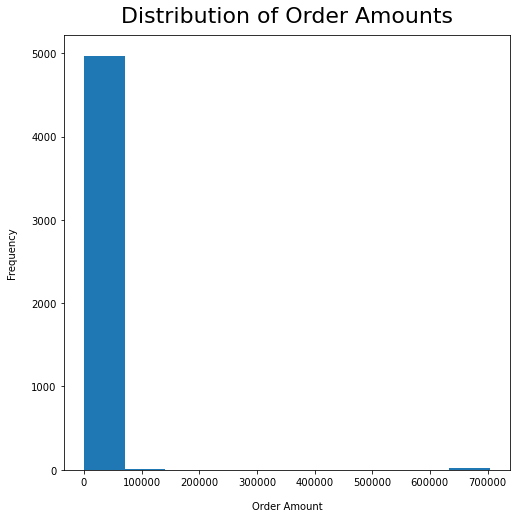

In [4]:
dfOriginal['order_amount'].plot(kind='hist', figsize=(8, 8))
plt.xlabel("Order Amount", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Distribution of Order Amounts", y=1.015, fontsize=22);

From the histogram I was able to have a foundation of how the data values under order_amout column is being distributed. Most of the values are concentrated within the 100000 area, however, there contains outliers that is in the 700000 area.

In order to calculate the avaerage order value it is necessary for me to figure out how to handle these outliers. 

#### Sort, Group & Analysis

Since I want to investigate furthure focusing on the outliers contained within the "order_amount" column thus I have decided to sort and order the data set based on decending orders of  order_amount to see if I can see any significant trends

In [14]:
dfOriginal.sort_values(by=["order_amount"], ascending = False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
...,...,...,...,...,...,...,...
3871,3872,92,818,90,1,debit,2017-03-18 9:10:08
2503,2504,92,935,90,1,credit_card,2017-03-28 2:30:26
4414,4415,92,927,90,1,credit_card,2017-03-17 9:57:01
3363,3364,92,730,90,1,credit_card,2017-03-11 23:20:31


From the above table it is apparent that a lot of the order amounts are being repeated. Therefore, I think grouping those values together and counting the total amount of duplicates would be an effective step

In [18]:
dfGrouped = dfOriginal.groupby(['order_amount']).size().reset_index(name='total').sort_values(by=['total'], ascending = False)
dfGrouped.head(10)

,order_amount,total
28,153,87
87,306,85
108,354,82
31,156,75
33,160,75
90,312,75
92,320,72
21,142,72
96,328,68
141,459,67


I have decided to sort the repeated total of each order amount in decending order, it seems like the top 10 repeated ordered amount falls within the 0 - 100000 area under the histogram. Now lets take a look at the outliers. 

In [17]:
dfGrouped.sort_values(by=['order_amount'], ascending = False)

,order_amount,total
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
...,...,...
4,112,48
3,111,16
2,101,15
1,94,25


From the above table we can see that 704000 which is an outlier according to the histogram is repeated 17 times, therefore, I decided to take a closer look at those 17 individual orders.

In [23]:
dfOriginal.loc[dfOriginal['order_amount'].isin([704000])].sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00


It is interesting to see that there are a lot of similarities under the order amount 704000. Shop_id 42 is placing the same amount of orders at the exact same time everyday. 

To better deal with the outliers of the dataset I have decided to use a boxplot and calculate the quartiles.

#### Boxplot & Quartile Calculations
The interquartile range (IQR) is used to determine the outliers of a dataset. Outliers are usually defined as observations that fall under 1.5 of quartile one or fall above 1.5 of quartile three. Therefore, I have decided to use a boxplot to represent this data, since the highest/lowest values that falls within the limit would be indicarted by whiskers.

count    4738.000000
mean      283.814268
std       132.061996
min        90.000000
25%       161.000000
50%       272.000000
75%       362.000000
max       624.000000
Name: order_amount, dtype: float64

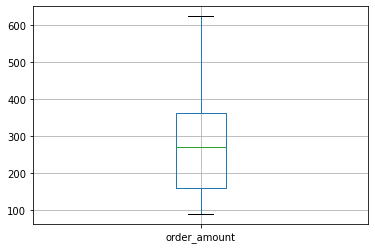

In [33]:
quartile1 = dfOriginal.order_amount.quantile(q=0.25)
quartile2 = dfOriginal.order_amount.quantile(q=0.50)
quartile3 = dfOriginal.order_amount.quantile(q=0.75)
IQR = quartile3 - quartile1

dfBox = dfOriginal[(dfOriginal.order_amount < quartile2 + IQR * 1.5) & (dfOriginal.order_amount > quartile2 - IQR * 1.5)]
dfBox.boxplot(column='order_amount')
dfBox.order_amount.describe()

From the above observation, the dataset is more skewed towards the lower half which represents the lower values. Therefore the metric that is more appropriate to report for this dataset would be the values that falls below tha median which would be quartile one

The value that represents the average order value would be the median which would be $272.00

### Answer Summary for Question 1

1. The initial calculation of the average order value (AOV) resulting in $3145 would be an inaccurate representation of the dataset since it did not give considerations to the outliers in the given dataset. A better approach to calculate the AOV would calculating the quartiles and eliminating the values that does not qualify within the given range.

2. That metric that is appropriate to report for this dataset would be quartile one meaning the data that falls below the median 

3. The final calculated AOV value would be $272.00

### Question 2:

1. How many orders were shipped by Speedy Express in total?
2. What is the last name of the employee with the most orders?
3. What product was ordered the most by customers in Germany?

#### Orders shipped by Speedy Express

Having a basic investigation on each tables provided I believe that inorder to determine the orders shipped by Speedy Express we should be focusing on the 'Orders' and 'Shipped' table since the two tables would be providing the required information. To calculate the amount of orders shipped I blieve that the count function must be used. 

After running this query the total amount of orders shipped by Speedy Express is 54 orders

#### Last name of employee with the most orders

To calculate this information I believe the focus should be on the 'Employees' and 'Orders' table and match the EmployeeId from the 'Orders' table with the EmployeeId from the 'Employees' table and group them according to their last name.

The result of this query indicates that Peacock with 40 orders is ranked first as the employee with the most orders

#### Product Ordered Most by customers in Germany

To determine the result for this question I think that I would need to focus on the 'Customers', 'OrderDetails' and the 'Products' tables. Just by investigating through the three tables I know that this problem is more complicated than the previous ones. Thus it is more efficient and effective to tackle this problem by stages.

##### Stage 1: Extract Products Purchased to Germany

In this stage I want to first extract the OrderID from the Orders tables that are being purchased from customers in Germany, therefore I only focused on the 'Orders' and 'Customers' table.

##### Stage 2: Identify the Products with the Highest Purchasing Rate and Determine the Product Name

In this stage I know that in order to calculate the product that was purchased the most I would have to apply the sum function to this query. I would extract relevant information from the 'Customers' and the 'OrderDetails' table.

The Product that is ordered most by customers in Germany would be the Boston Crab Meat